In [1]:
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt

In [2]:
#Import main Florida dataset
ca_ev_df = pd.read_csv(Path("../../../../data/processed_data/ca_ev_main_dataset.csv"))

In [3]:
#Examine Data
print("Shape:",ca_ev_df.shape)
display(ca_ev_df.columns)
display(ca_ev_df.head(10))

Shape: (600, 8)


Index(['year', 'state', 'county', 'zip_codes', 'population',
       'ev_registrations', 'cumulative_ev_stations', 'median_income'],
      dtype='object')

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986.0,20,0,"69,384"
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886.0,1,1,"54,758"
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540.0,10,0,"78,385"
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039.0,2,0,"46,430"
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009.0,2,0,"40,089"
5,2010,CA,Kern County,"[93203, 93205, 93206, 93215, 93216, 93220, 932...",840996.0,1,0,"47,089"
6,2010,CA,Lake County,"[95422, 95423, 95424, 95426, 95435, 95443, 954...",64735.0,1,0,"39,491"
7,2010,CA,Los Angeles County,"[90001, 90002, 90003, 90004, 90005, 90006, 900...",9823246.0,360,21,"55,476"
8,2010,CA,Marin County,"[94901, 94903, 94904, 94912, 94913, 94914, 949...",252904.0,15,0,"89,268"
9,2010,CA,Monterey County,"[93426, 93450, 93901, 93902, 93905, 93906, 939...",416373.0,1,0,"59,271"


In [4]:
ca_station_inc =ca_ev_df[["year","county","cumulative_ev_stations","median_income"]]

ca_station_inc.head()

,year,county,cumulative_ev_stations,median_income
0,2010,Alameda County,0,"69,384"
1,2010,Amador County,1,"54,758"
2,2010,Contra Costa County,0,"78,385"
3,2010,Fresno County,0,"46,430"
4,2010,Humboldt County,0,"40,089"


In [5]:
ca_station_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    600 non-null    int64 
 1   county                  589 non-null    object
 2   cumulative_ev_stations  600 non-null    int64 
 3   median_income           589 non-null    object
dtypes: int64(2), object(2)
memory usage: 18.9+ KB


In [24]:
ca_sta_inc_dna = ca_station_inc.dropna()

ca_sta_inc_dna["median_income"] = ca_sta_inc_dna["median_income"].str.replace(",", "")

ca_sta_inc_dna["median_income"] = ca_sta_inc_dna["median_income"].astype(int, errors="raise")

print(ca_station_inc.dtypes)

ca_sta_inc_dna

year                       int64
county                    object
cumulative_ev_stations     int64
median_income             object
dtype: object


/var/folders/qq/ry8l4vsn0ldbx6wbqlbms2dh0000gn/T/ipykernel_25849/2424363144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_sta_inc_dna["median_income"] = ca_sta_inc_dna["median_income"].str.replace(",", "")
/var/folders/qq/ry8l4vsn0ldbx6wbqlbms2dh0000gn/T/ipykernel_25849/2424363144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_sta_inc_dna["median_income"] = ca_sta_inc_dna["median_income"].astype(int, errors="raise")


,year,county,cumulative_ev_stations,median_income
0,2010,Alameda County,0,69384
1,2010,Amador County,1,54758
2,2010,Contra Costa County,0,78385
3,2010,Fresno County,0,46430
4,2010,Humboldt County,0,40089
...,...,...,...,...
594,2020,Tulare County,16,52534
595,2020,Tuolumne County,9,60509
596,2020,Ventura County,117,89295
597,2020,Yolo County,53,73746


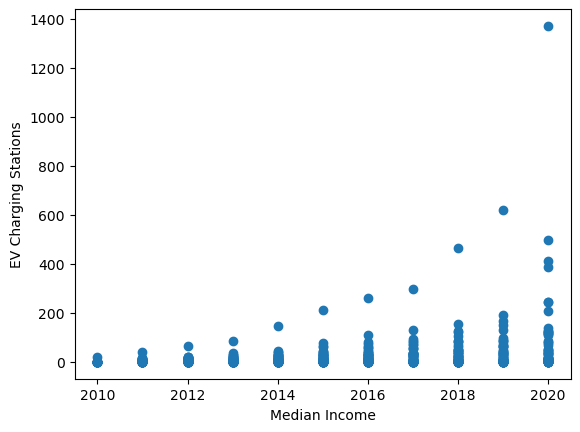

In [28]:
# x_values = ca_station_inc['median_income']
# y_values = ca_station_inc['cumulative_ev_stations']
# plt.scatter(x_values,y_values)
# plt.xlabel('Median Income')
# plt.ylabel('EV Charging Stations')
# plt.show()

x_values = ca_station_inc['year']
y_values = ca_station_inc['cumulative_ev_stations']
plt.scatter(x_values,y_values)
plt.xlabel('Median Income')
plt.ylabel('EV Charging Stations')
plt.show()